# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [98]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [99]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(loc = 20, scale = 4, size=10000),
                     "binomial": sct.binom.rvs(100, p = 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [100]:
# Sua análise da parte 1 começa aqui.


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [101]:
#Quartis da normal:
norm_quant = dataframe.normal.quantile([.25,.5,.75])
binom_quanto = dataframe.normal.quantile([.25,.5,.75])

a1 = round(norm_quant - binom_quanto,3)


In [102]:
(norm_quant, binom_quanto)

(0.25    17.309638
 0.50    19.989620
 0.75    22.684324
 Name: normal, dtype: float64,
 0.25    17.309638
 0.50    19.989620
 0.75    22.684324
 Name: normal, dtype: float64)

In [103]:
def q1():
    a1
    # Retorne aqui o resultado da questão 1.
    pass

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

In [104]:
# Esperava por que para um valor de n (experimentos) maior do que 20 a binomial já se aproxima de uma normal 

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [105]:
#Não ira depender da função normal que eu estiver utilizando
superior = dataframe.normal.mean() + dataframe.normal.std()
inferior = dataframe.normal.mean() - dataframe.normal.std()

(inferior, superior)

(15.977606544512675, 24.005305588539912)

In [106]:
f1_superior = sct.norm.cdf(superior, loc = dataframe.normal.mean(), scale = dataframe.normal.std())
f1_inferior = sct.norm.cdf(inferior, loc = dataframe.normal.mean(), scale = dataframe.normal.std())

a2 = round(f1_superior - f1_inferior, 3)
a2

0.683

In [107]:

def prob_inter(dataframe, m):
    sup = dataframe.normal.mean() + m*dataframe.normal.std()
    inf = dataframe.normal.mean() - m*dataframe.normal.std()
    f_sup = sct.norm.cdf(sup, loc = dataframe.normal.mean(), scale = dataframe.normal.std())
    f_inf = sct.norm.cdf(inf, loc = dataframe.normal.mean(), scale = dataframe.normal.std())

    prob = round(f_sup - f_inf, 3)
    
    return prob

In [108]:
a2 = prob_inter(dataframe, 1)

In [109]:
def q2():
    a2
    # Retorne aqui o resultado da questão 2.
    pass

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [110]:
#De acordo com o esperado o valor seria de 68,27 %, como está arredondado
#Experimentando:
#List comprehension
[prob_inter(dataframe, x) for x in [1,2,3]]
    


[0.683, 0.954, 0.997]

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [111]:
def questao3(dataframe):
    m_binom = dataframe.binomial.mean()
    v_binom = dataframe.binomial.var()
    m_norm = dataframe.normal.mean()
    v_norm = dataframe.normal.var()

    return (m_binom, v_binom, m_norm, v_norm)

In [112]:
array_q3 = questao3(dataframe); array_q3
a3 = (array_q3[0] - array_q3[2], array_q3[1] - array_q3[3])
a3

(0.10554393347370805, 0.2202361370433188)

In [113]:
def q3():
    a3
    # Retorne aqui o resultado da questão 3.
    pass

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

In [114]:
#Efeito na kurtosis, ficando mais fina (leptocúrtica, b2>0)

In [115]:
from math import sqrt

In [116]:
np.random.seed(42)

def norm_binom(n, p, size):
    df = pd.DataFrame({"normal": sct.norm.rvs(loc = n*p, scale = sqrt(n*p*(1-p)), size=size),
                     "binomial": sct.binom.rvs(n, p = p, size=size)}) 
    return df

df_100 = norm_binom(100, 0.2, 10000)
df_1000 = norm_binom(1000, 0.2, 10000)

(df_100.kurtosis(), df_1000.kurtosis())

(normal      0.027093
 binomial    0.002033
 dtype: float64,
 normal     -0.049561
 binomial    0.012410
 dtype: float64)

In [117]:
n = 10000; p = 0.2; size = 10000

#Sendo a média 20, utilizar o range (0,40) para visualização
left = norm_binom(n,p,size).mean() -4*norm_binom(n,p,size).std()
right = norm_binom(n,p,size).mean() +4*norm_binom(n,p,size).std()

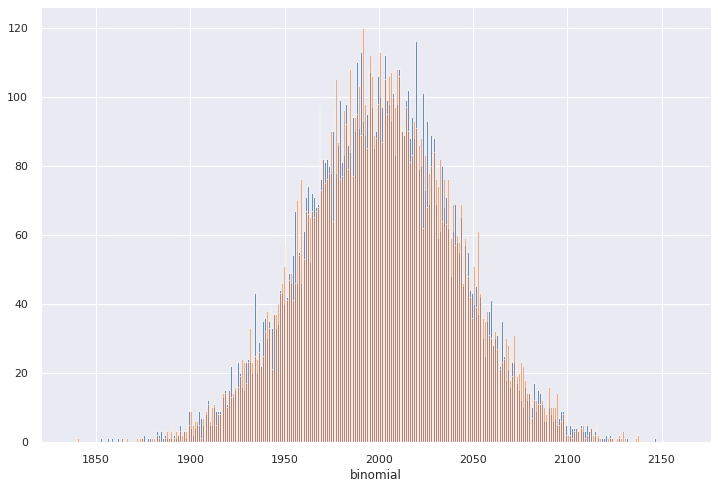

In [118]:
sns.distplot(norm_binom(n,p,size).normal, bins = range(int(left[0]),int(right[0])), kde = False, hist_kws={'alpha': 0.8}) 
sns.distplot(norm_binom(n,p,size).binomial, bins = range(int(left[1]),int(right[1])), kde = False, hist_kws={'alpha': 0.6})

## Parte 2

### _Setup_ da parte 2

In [119]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

In [120]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Inicie sua análise da parte 2 a partir daqui

In [121]:
# Sua análise da parte 2 começa aqui.


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [122]:
#Mas então o resultado só poder ser 0,8, 0,9 e 0,95 se a mean_profile foi padronizada

In [123]:
#Número de pulsars e não pulsars
stars.target.value_counts()

False    16258
True      1639
Name: target, dtype: int64

In [124]:
#1 Filtrar:
false_pulsar_mean_profile = stars[stars['target']==0]['mean_profile']; false_pulsar_mean_profile

0        102.507812
1        103.015625
2        136.750000
3         88.726562
4         93.570312
            ...    
17892    136.429688
17893    122.554688
17894    119.335938
17895    114.507812
17896     57.062500
Name: mean_profile, Length: 16258, dtype: float64

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   3.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   1.,
          7.,   6.,   3.,   2.,   5.,   8.,   6.,   8.,  19.,  23.,  35.,
         49.,  62.,  91., 105., 120., 148., 167., 190., 193., 235., 258.,
        296., 323., 354., 376., 426., 435., 516., 525., 610., 606., 637.,
        636., 610., 646., 719., 646., 662., 626., 594., 572., 520., 424.,
        403., 414., 339., 316., 216., 207., 176., 129., 119.,  73.,  71.,
         56.,  50.,  35.,  25.,  25.,  18.,  15.,   7.,   5.,   5.,   8.,
          5.,   6.,   3.,   5.,   3.,   2.,   3.,   4.,   1.,   0.,   2.,
          1.]),
 array([-5.68530898, -5.58493298, -5.48455697, -5.38418097, -5.28380497,
        -5.18342896, -5.08305296, -4.98267696, -4.88230096, -4.78192495,
        -4.68154895, -4.58117295, -4.48079694, -4.38042094, -4.28004494,
        -4.17966893, -4.07929293, -3.97891693, -3.87854093, -3.77816492,
        -3.67778892, -3.57

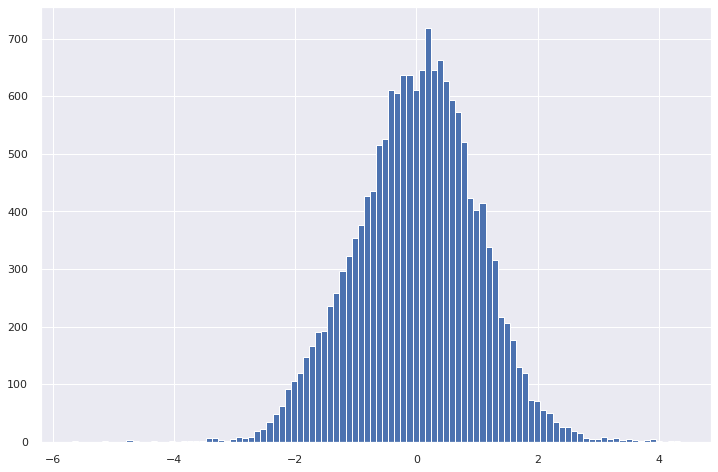

In [125]:
#2 Padronizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
values = false_pulsar_mean_profile.values.reshape(-1,1)
false_pulsar_mean_profile_standardized = scaler.fit_transform(values); plt.hist(false_pulsar_mean_profile_standardized, bins = 100)

In [126]:
(false_pulsar_mean_profile_standardized.mean(), false_pulsar_mean_profile_standardized.std())

(2.3556558898677207e-16, 0.9999999999999999)

In [127]:
#Encontrar os quantis teóricos, ou seja, encontrar os xs tais que representem 0.8, 0.90 e 0.95 da probabilidade
quantis_teoricos = [sct.norm.ppf(x,loc = 0, scale = 1) for x in [0.8,0.90,0.95]]; quantis_teoricos


[0.8416212335729143, 1.2815515655446004, 1.6448536269514722]

In [128]:
#Probabilidades associadas destes quantis:
a4_notr =[sct.norm.cdf(x, loc = false_pulsar_mean_profile_standardized.mean(), scale = false_pulsar_mean_profile_standardized.std()) for x in quantis_teoricos]

In [129]:
a4 =np.round(np.array(a4_notr),3)

In [130]:
def q4():
    a4
    # Retorne aqui o resultado da questão 4.
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [131]:
#Quantis da false_pulsar_mean_profile_standardized
def quantiles(df):
    return df.quartile[.25,.5,.75]

In [132]:
df_pulsar = pd.DataFrame(false_pulsar_mean_profile_standardized)

In [133]:
q_false_mean_profile_standardizes = df_pulsar.quantile([.25, .5, .75]); q_false_mean_profile_standardizes

,0
0.25,-0.647173
0.50,0.039861
0.75,0.670675


In [134]:
#Criação da normal para comparar com a false_pulsar... 
normal = pd.DataFrame(sct.norm.rvs(loc = 0, scale =1, size = 1000000))

In [135]:
quantiles_normal = normal.quantile([.25,.5,.75]); quantiles_normal

,0
0.25,-0.677348
0.50,-0.000625
0.75,0.674083


In [136]:
#Resposta da 5:
a5 = np.round(q_false_mean_profile_standardizes - quantiles_normal,3 ); a5

,0
0.25,0.030
0.50,0.040
0.75,-0.003


In [137]:
def q5():
    # Retorne aqui o resultado da questão 5.
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.

In [138]:
#Fazem sentido porque estão próximos de 0, devido a ambas distribuições serem padronizadas
#Isso pode dizer que de fato a variável false_pulsar_mean_profile_standardized foi padronizada corretamente
#Sensacional